# **Modeling**

## **Importing Required Libraries**

In [272]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## **Loading the Dataset with Engineered Features**

In [273]:
df = pd.read_csv('/workspaces/Bangladesh-Real-State-Price-Prediction/data/processed/data_with_features.csv')

## **Split Data into Features and Target**

In [274]:
X = df.drop('Price_in_taka', axis=1)
y = df['Price_in_taka']

## **Train-Test Split**

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

## **Initialize and Train Models**

### **Model 1: Linear Regression**

In [276]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

### **Model 2: Random Forest Regressor**

In [277]:
rf = RandomForestRegressor(random_state=50)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

### **Model 3: Gradient Boosting Regressor**

In [278]:
gbr = GradientBoostingRegressor(random_state=50)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

## **Evaluated and Compare Models**


In [279]:
lr.score(X_test, y_test)

0.3355883379299426

In [280]:
rf.score(X_test, y_test)

0.9674582259104582

In [281]:
gbr.score(X_test, y_test)

0.9801872679803578

In [282]:
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_lr, rmse_rf, rmse_gbr],
    'R²': [r2_lr, r2_rf, r2_gbr]
})

In [283]:
model_comparison

,Model,RMSE,R²
0,Linear Regression,1.192261,0.335588
1,Random Forest,0.263860,0.967458
2,Gradient Boosting,0.205885,0.980187


## **Visualizing Model Performance**

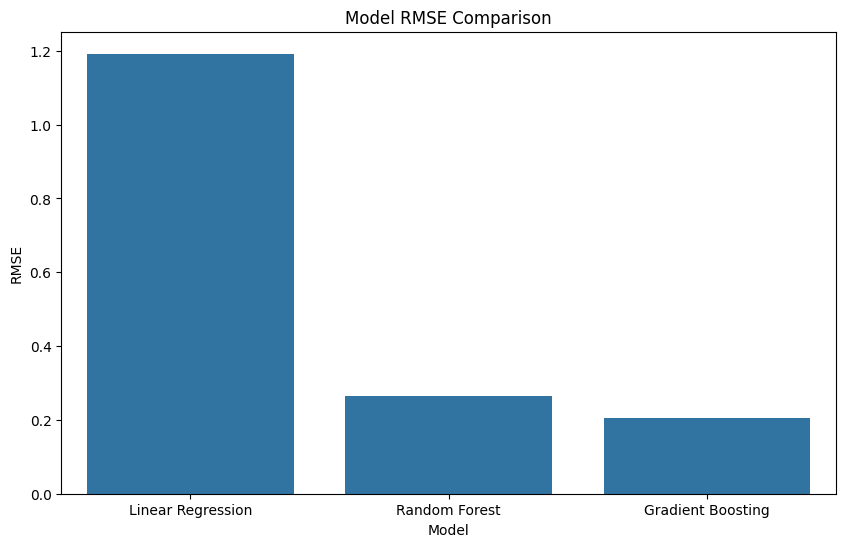

In [284]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=model_comparison)
plt.title('Model RMSE Comparison')
plt.show()

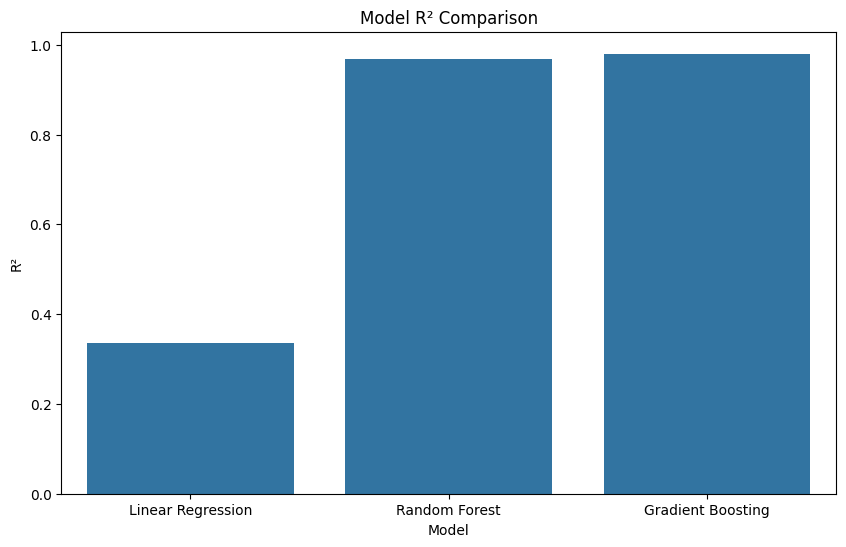

In [285]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=model_comparison)
plt.title('Model R² Comparison')
plt.show()

## **Saving the Best Performing Model**

In [286]:
gradient_boosting = gbr
random_forest = rf

with open('/workspaces/Bangladesh-Real-State-Price-Prediction/models/gradient_boosting.pkl', 'wb') as f:
    pickle.dump(gradient_boosting, f)

with open('/workspaces/Bangladesh-Real-State-Price-Prediction/models/random_forest.pkl', 'wb') as f:
    pickle.dump(random_forest, f)